# Viscous streaming solution in frequency domain

In this notebook, we seek to solve for viscous streaming in the frequency domain.

$$ \mathcal{L}_\alpha u = i\alpha u  - L u = f $$

where $\alpha$ is a real-valued constant, $L$ is the grid Laplacian operator, and $u$ is a complex-valued field on the grid. It should be noted that $\alpha = \omega \Delta x^2/\nu$, where $\omega$ is a frequency, $\nu$ is kinematic viscosity, and $\Delta x$ is the grid spacing. The operator $\mathcal{L}_\alpha$ we will call the Helmholtz operator.

In [1]:
using Pkg

In [3]:
pkg"update"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Updating git-repo `https://github.com/jdeldre/ViscousFlow.jl.git`
  Updating git-repo `https://github.com/jdeldre/ViscousStreaming.jl.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [==============================>          ]  75.0 % Resolving package versions...
 Installed Revise ───────── v2.3.1
 Installed OrdinaryDiffEq ─ v5.23.0
  Updating `~/JuliaProjects/ViscousStreaming/notebooks/Project.toml`
  [1dea7af3] ↑ OrdinaryDiffEq v5.20.1 ⇒ v5.23.0
  [295af30f] ↑ Revise v2.3.0 ⇒ v2.3.1
  [47fb7046] ~ ViscousStreaming v0.1.0 #master (https://github.com/jdeldre/ViscousStreaming.jl.git)
  Updating `~/JuliaProjects/ViscousStreaming/notebooks/Manifest.toml`
  [1dea7af3] ↑ OrdinaryDiffEq v5.20.1 ⇒ v5.23.0
  [295af30f] ↑ Revise v2.3.0 ⇒ v2.3.1
  [90137ffa] ↑ StaticArrays v0.11.1 ⇒ v0.12.1
  [47fb7046] ~ ViscousStreaming v0.1.0 #master (htt

In [4]:
using Plots

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Warning: Module JSON with build ID 501974462764756 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1017
┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/NaNMath/k9Y1O.ji for NaNMath [77ba4419-2d1f-58cd-9bb1-8ffee604a2e3]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/GR/NDU5Y.ji for GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71]
└ @ Base loading.jl:1240


In [5]:
using ViscousStreaming

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/ViscousStreaming/UPKy8.ji for ViscousStreaming [47fb7046-13b0-40db-b6a6-74fa44cf0959]
└ @ Base loading.jl:1240
[ Info: Building and caching LGF table
┌ Warning: Module Compat with build ID 511506591991003 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module Compat with build ID 511506591991003 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module Compat with build ID 511506591991003 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module Compat with build ID 511506591991003 is mi

┌ Warning: Module MacroTools with build ID 731728885563441 is missing from the cache.
│ This may mean MacroTools [1914dd2f-81c6-5fcd-8719-6d5c9610ff09] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module MacroTools with build ID 731728885563441 is missing from the cache.
│ This may mean MacroTools [1914dd2f-81c6-5fcd-8719-6d5c9610ff09] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Skipping precompilation since __precompile__(false). Importing LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d].
└ @ Base loading.jl:1017
┌ Info: Precompiling SimpleTraits [699a6c99-e7fa-54fc-8d76-47d257e15c1d]
└ @ Base loading.jl:1242
┌ Warning: Module MacroTools with build ID 731728885563441 is missing from the cache.
│ This may mean MacroTools [1914dd2f-81c6-5fcd-8719-6d5c9610ff09] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Sk

In [6]:
Re = 40
ϵ = 0.1

0.1

### Set up analytical solution

In [7]:
p = StreamingParams(ϵ,Re)

Streaming flow parameters with Re = 40.0, ϵ = 0.1


In [8]:
s = StreamingAnalytical(p)

Maximum residual on W₁ = 1.1368683772161603e-13
BC residual on Ψ₁(1) = 2.7755575615628914e-17
BC residual on dΨ₁(1) = 5.23691153334427e-16
Maximum residual on Ws₂ = 1.3073986337985843e-12
BC residual on Ψs₂(1) = 0.0
BC residual on dΨs₂(1) = 8.881784197001252e-16
Maximum residual on W₂ = 2.1179418493558537e-12
BC residual on Ψ₂(1) = 1.734723475976807e-17
BC residual on dΨ₂(1) = 0.0


Analytical streaming flow solution for
single cylinder with Re = 40.0, ϵ = 0.1


### Set up the basic system

#### Set up the grid cell size and approximate dimensions

In [9]:
Δx = 0.02
xlim = (-5.98,5.98)
ylim = (-5.98,5.98)

(-5.98, 5.98)

#### Set up a body

In [10]:
n = 150
body = Circle(1.0,n)

Circular body with 150 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [11]:
@time solver1 = FrequencyStreaming(Re,ϵ,Δx,xlim,ylim,body);

 97.563007 seconds (411.27 M allocations: 38.325 GiB, 11.03% gc time)


In [12]:
soln = solver1([1.0,0.0],body);

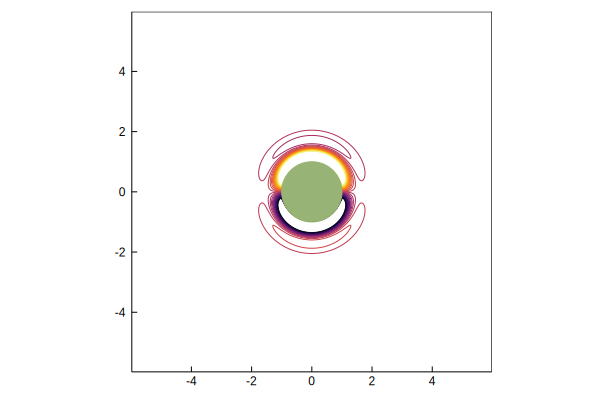

In [13]:
xg, yg = coordinates(soln.s1.W,solver1.grid)
plot(xg,yg,vorticity(0,soln.s1),levels=range(-2,2,length=30),clim=(-2,2),xlim=xlim,ylim=ylim)
plot!(body)

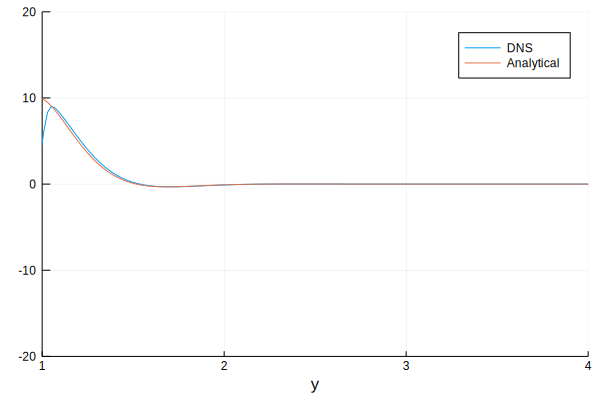

In [14]:
ix = 301
plot(yg,vorticity(0,soln.s1)[301,:],ylim=(-20,20),xlim=(1,4),label="DNS",xlabel="y")
plot!(yg,map(y -> vorticity(xg[ix],y,0.0,firstorder(s)),abs.(yg)),label="Analytical")

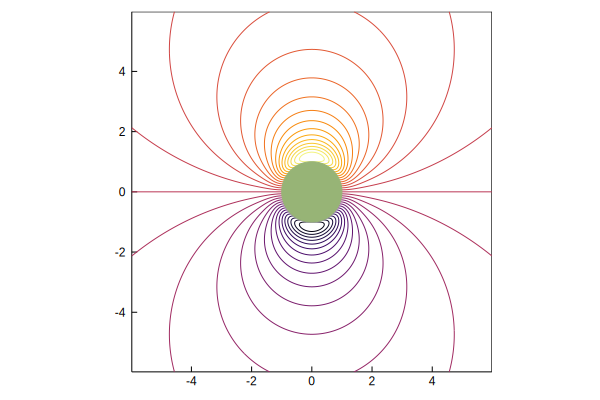

In [15]:
plot(xg,yg,streamfunction(0,soln.s1),levels=range(-1,1,length=31),xlim=xlim,ylim=ylim)
plot!(body)

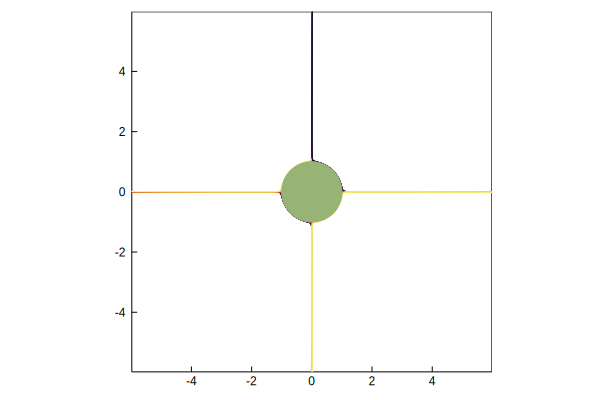

In [16]:
plot(xg,yg,vorticity(soln.s̄2),levels=range(-10,10,length=30),clim=(-10,10),xlim=xlim,ylim=ylim)
plot!(body)

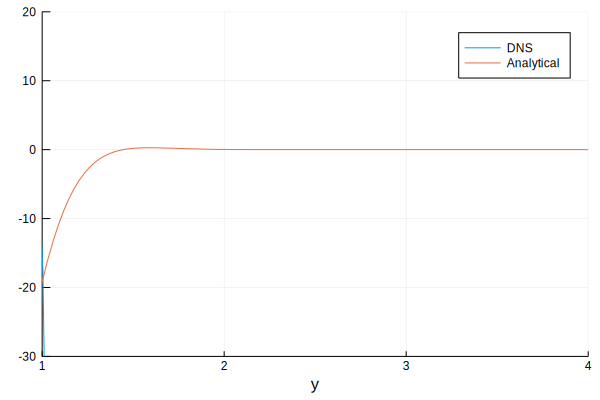

In [17]:
rg = sqrt.(xg.^2+yg.^2)
plot(rg,map(ix -> vorticity(soln.s̄2)[ix,ix],1:length(rg)),ylim=(-30,20),xlim=(1,4),label="DNS",xlabel="y")
plot!(rg,map(x -> vorticity(x,x,secondordermean(s)),xg),label="Analytical")

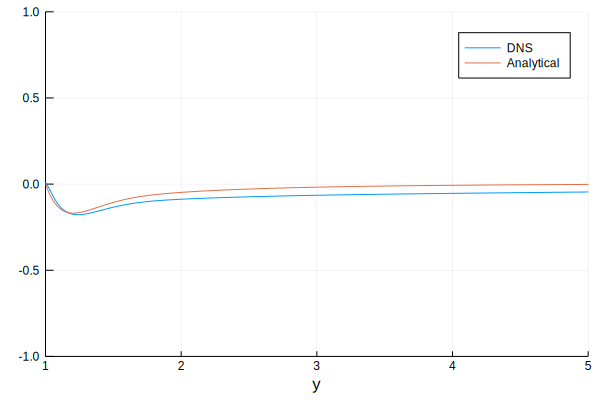

In [369]:
ig = 120
rg = sqrt.(xg[ig:end].^2+yg[ig:end].^2)
plot(rg,map(ix -> streamfunction(soln.s̄2)[ix,ix],ig:length(xg)),ylim=(-1,1),xlim=(1,5),label="DNS",xlabel="y")
#plot!(rg,map(ix -> Δx*real(s22)[ix,ix],ig:length(xg)),ylim=(-1,1),xlim=(0.5,2),label="DNS",xlabel="y")
plot!(rg,map(x -> streamfunction(x,x,secondordermean(s)),xg[ig:end]),label="Analytical")

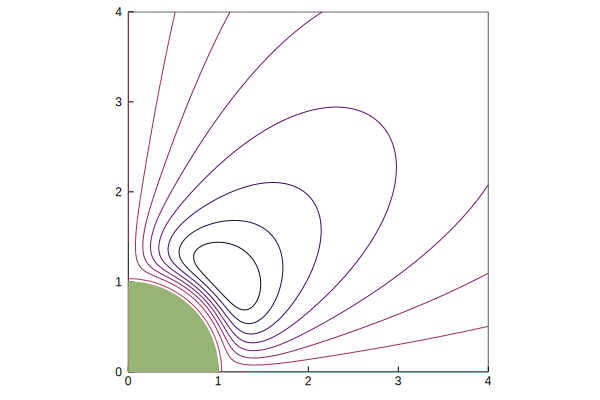

In [10]:
plot(xg,yg,lagrangian_mean_streamfunction(soln),levels=15,xlim=(0,4),ylim=(0,4))
plot!(body)

### Now multiple bodies

In [150]:
bl = BodyList()

BodyList(Body[])

In [151]:
bL = deepcopy(body)
bR = deepcopy(body)

Circular body with 150 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [153]:
# left cylinder
cent = (-3.0,0.0)
α = 0.0
TL = RigidTransform(cent,α)
TL(bL) # transform the body to the current configuration

# right cylinder
cent = (3.0,0.0)
α = 0.0
TR = RigidTransform(cent,α)
TR(bR) # transform the body to the current configuration

push!(bl,bL)
push!(bl,bR)

2-element Array{Body,1}:
 Circular body with 150 points and radius 1.0
   Current position: (-3.0,0.0)
   Current angle (rad): 0.0

 Circular body with 150 points and radius 1.0
   Current position: (3.0,0.0)
   Current angle (rad): 0.0
 

#### Set up the system

In [154]:
@time solver2 = FrequencyStreaming(Re,ϵ,Δx,xlim,ylim,bl);

197.680179 seconds (1.47 G allocations: 103.494 GiB, 18.00% gc time)


In [220]:
soln = solver2([[0.0,0.0],[0.0,1.0]],bl);

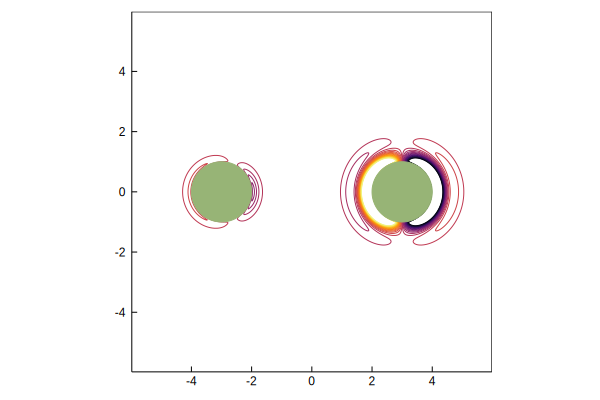

In [221]:
xg, yg = coordinates(soln.s1.W,soln.g)
plot(xg,yg,vorticity(0,soln.s1),levels=range(-2,2,length=30),clim=(-2,2),xlim=xlim,ylim=ylim)
plot!(bl)

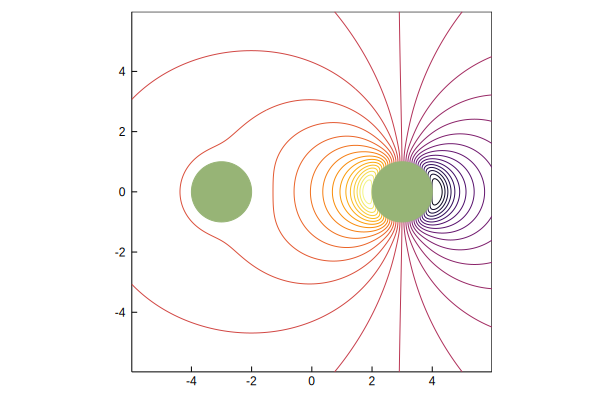

In [222]:
plot(xg,yg,streamfunction(0,soln.s1),levels=range(-1,1,length=31),xlim=xlim,ylim=ylim)
plot!(bl)

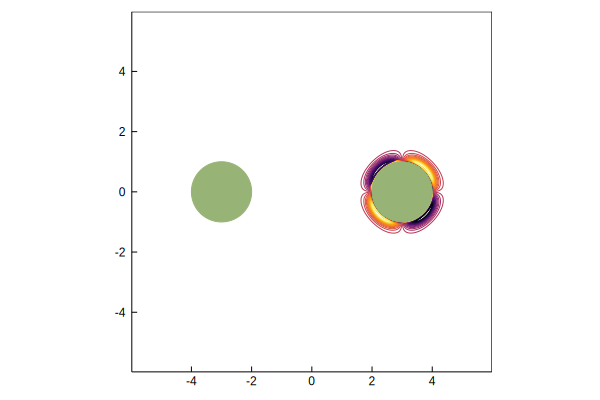

In [223]:
plot(xg,yg,vorticity(soln.s̄2),levels=range(-10,10,length=30),clim=(-10,10),xlim=xlim,ylim=ylim)
plot!(bl)

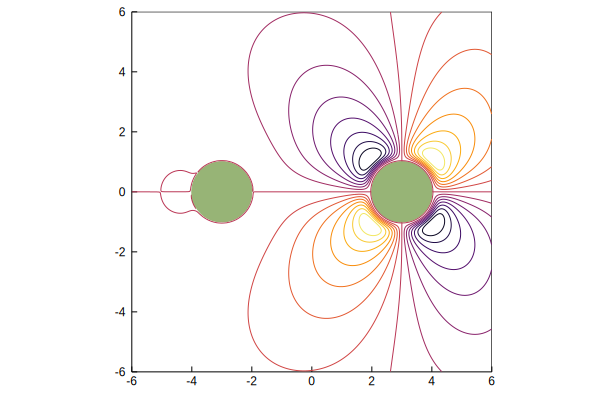

In [224]:
plot(xg,yg,lagrangian_mean_streamfunction(soln),levels=15,xlim=(-6,6),ylim=(-6,6))
plot!(bl)

### Now multiple smaller bodies

Here, we will keep Re = 40, but effectively lower the Reynolds number by using smaller bodies. This should move the trapping points away from the bodies, thereby reducing the need for accuracy near them.

In [97]:
bl = BodyList()

BodyList(Body[])

In [98]:
n = 30
smallbody = Circle(0.2,n)

Circular body with 30 points and radius 0.2
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [99]:
b11 = deepcopy(smallbody)
b12 = deepcopy(smallbody)
b21 = deepcopy(smallbody)
b22 = deepcopy(smallbody)
b00 = deepcopy(smallbody)

Circular body with 30 points and radius 0.2
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [100]:
α = 0.0

# left lower cylinder
cent = (-3.0,-3.0)
T11 = RigidTransform(cent,α)
T11(b11) # transform the body to the current configuration

# right lower cylinder
cent = (3.0,-3.0)
α = 0.0
T12 = RigidTransform(cent,α)
T12(b12) # transform the body to the current configuration

# left upper cylinder
cent = (-3.0,3.0)
T21 = RigidTransform(cent,α)
T21(b21) # transform the body to the current configuration

# right upper cylinder
cent = (3.0,3.0)
α = 0.0
T22 = RigidTransform(cent,α)
T22(b22) # transform the body to the current configuration

# middle cylinder
cent = (0.0,0.0)
α = 0.0
T00 = RigidTransform(cent,α)
T00(b00) # transform the body to the current configuration


push!(bl,b11)
push!(bl,b12)
push!(bl,b21)
push!(bl,b22)
push!(bl,b00)

5-element Array{Body,1}:
 Circular body with 30 points and radius 0.2
   Current position: (-3.0,-3.0)
   Current angle (rad): 0.0

 Circular body with 30 points and radius 0.2
   Current position: (3.0,-3.0)
   Current angle (rad): 0.0
 
 Circular body with 30 points and radius 0.2
   Current position: (-3.0,3.0)
   Current angle (rad): 0.0
 
 Circular body with 30 points and radius 0.2
   Current position: (3.0,3.0)
   Current angle (rad): 0.0
  
 Circular body with 30 points and radius 0.2
   Current position: (0.0,0.0)
   Current angle (rad): 0.0
  

#### Set up the system

In [101]:
@time solver5 = FrequencyStreaming(Re,ϵ,Δx,xlim,ylim,bl);

 98.221089 seconds (364.55 M allocations: 42.516 GiB, 14.81% gc time)


#### Inertial particle transport

In [105]:
p_inert = InertialParameters(tau=0.1,beta=0.95,epsilon=ϵ,Re=Re)

InertialParameters(0.95, 0.1, 0.1, 40)

Here, we just play around, setting every amplitude component

In [335]:
fill!.(ampvec,1)
ampvec[4] = [1.5,1.5]
fsoln = solver5(ampvec,bl);

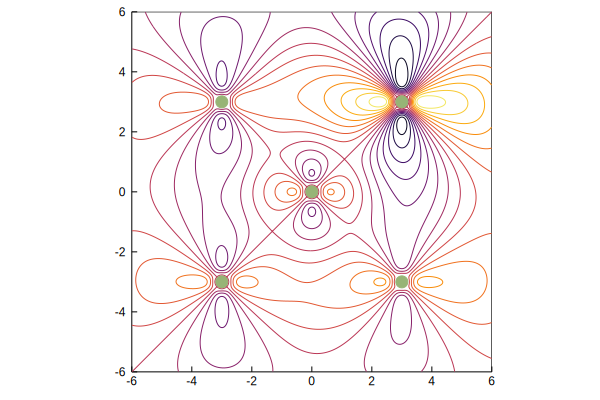

In [336]:
xg, yg = coordinates(soln.s1.W,soln.g)
plot(xg,yg,lagrangian_mean_streamfunction(fsoln),levels=15,xlim=(-6,6),ylim=(-6,6))
plot!(bl)

Below, we precompute the flow solutions and interpolatable Lagrangian mean particle velocities for every individual motion 

In [338]:
using Interpolations
xu, yu = coordinates(v̄L.u, soln_inertial.g)
xv, yv = coordinates(v̄L.v, soln_inertial.g)

(-5.98:0.02:5.98, -5.99:0.02:5.99)

In [339]:
ampvec = [[0.0,0.0] for i in 1:10]
v̄Luvec = typeof(v̄Luxy)[]
v̄Lvvec = typeof(v̄Lvxy)[]
fsolnvec = StreamingComputational{ViscousStreaming.FluidFlow}[]
for i in 1:10
    ampvec = zero.(ampvec)
    ampvec[floor(Int,(i+1)/2)][2-mod(i,2)] = 1.0
    push!(fsolnvec,solver5(ampvec,bl))
    isoln = inertial_velocity(fsolnvec[i],p_inert)
    v̄L = lagrangian_mean_velocity(isoln)
    v̄Luxy = CubicSplineInterpolation((xu, yu),v̄L.u, extrapolation_bc = (Flat(),Flat()))
    v̄Lvxy = CubicSplineInterpolation((xv, yv),v̄L.v, extrapolation_bc = (Flat(),Flat()))
    push!(v̄Luvec,v̄Luxy)
    push!(v̄Lvvec,v̄Lvxy)
end

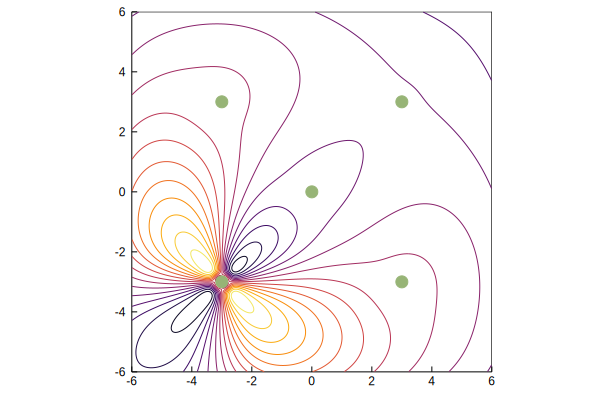

In [337]:
xg, yg = coordinates(soln.s1.W,soln.g)
plot(xg,yg,lagrangian_mean_streamfunction(fsolnvec[1]),levels=15,xlim=(-6,6),ylim=(-6,6))
plot!(bl)

Plan: Need to create a function that accepts the frequency-based flow solver and a plan for how to apply a series of motion primitives. This plan should be a function of time, and the output of this plan should be a specification of the U,V amplitudes of every body in the list. This would be passed to the solver to generate the fluid flow soln, and thence to the inertial_velocity for the inertial particle solution and lagrangian mean velocity.

The final result should be a callable function that returns the time-varying Lagrangian mean velocity, to be used by the compute_trajectory function.

Here, we set up a function that calls the appropriate interpolated field in the given time interval.

In [358]:
Tswitch = [0,35000Tp,105000Tp,140000Tp,175000Tp,210000Tp,Inf]
iswitch = [1,9,3,9,5,9]; # The motion primitive to call in each time interval

In [359]:
function motion_assembly(dR,R,p,t,v̄Luvec,v̄Lvvec,bswitch,Tswitch)
    index = findall(!iszero,diff(sign.(t .- Tswitch)))[1]
    v̄Lu, v̄Lv = v̄Luvec[iswitch[index]], v̄Lvvec[iswitch[index]]
    dR[1] = v̄Lu(R[1],R[2])
    dR[2] = v̄Lv(R[1],R[2])
    
   return dR 
end

motion_assembly (generic function with 2 methods)

In [360]:
v̄Lfcn(dR,R,p,t) = motion_assembly(dR,R,p,t,v̄Luvec,v̄Lvvec,bswitch,Tswitch)

v̄Lfcn (generic function with 1 method)

In [361]:
#=
function v̄Lfcn(dR,R,p,t)
    
   dR[1] = v̄Luxy(R[1],R[2])
   dR[2] = v̄Lvxy(R[1],R[2])
    
   return dR 
end
=#

In [362]:
X₀ = (-1.0,-1.0)
Ω = 1.0
Tp = 2π/Ω
Tmax = 220000*Tp

1.382300767579509e6

In [363]:
solL = compute_trajectory(v̄Lfcn,X₀,Tmax,10Tp,bl=bl,ϵ=p.ϵ);

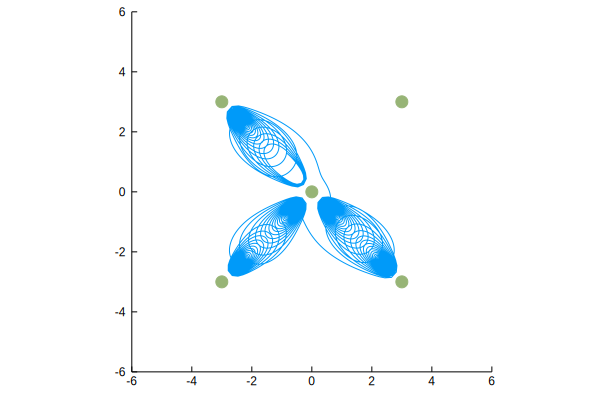

In [364]:
plot(solL[1,:],solL[2,:],ratio=1,legend=false,linewidth=1,xlim=(-6,6),ylim=(-6,6))
plot!(bl)
#plot!(xg,yg,lagrangian_mean_streamfunction(soln),levels=15,xlim=(0,4),ylim=(0,4))

In [34]:
@recipe function plot(x::AbstractArray{S,1},y::AbstractArray{S,1},w::Union{Fields.XEdges{T,NX,NY},Fields.YEdges{T,NX,NY}};trim=0) where {S,T,NX,NY}
      grid --> :none
      ratio := 1
      linewidth --> 1
      legend --> :none
      framestyle --> :frame
      levels --> range(minimum(w.data),stop=maximum(w.data),length=16)
      @series begin
        seriestype --> :contour
        x[1+trim:end-trim],y[1+trim:end-trim],transpose(w.data[1+trim:end-trim,1+trim:end-trim])
      end
end

In [48]:
unode = Nodes(Dual,v̄L)
vnode = Nodes(Dual,v̄L)
Fields.interpolate!(unode,v̄L.u)
Fields.interpolate!(vnode,v̄L.v)
qnode = Nodes(Dual,v̄L)
qnode .= sqrt.(unode.^2 + vnode.^2);

In [59]:
minimum(qnode[2:end-1,2:end-1])

1.0304123746826242e-5

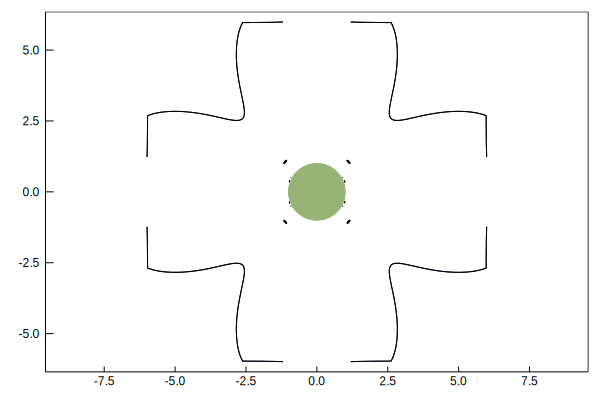

In [62]:
xu,yu = coordinates(v̄L.u,solver1.grid)
xv,yv = coordinates(v̄L.v,solver1.grid)
#plot(xu,yu,v̄L.u,levels=[0,0])
#plot!(xv,yv,v̄L.v,levels=[0,0])
plot(xg,yg,qnode,levels=[1e-4,1e-4])
#plot!(solL[1,:],solL[2,:],ratio=1,legend=false,linewidth=1,xlim=(-6,6),ylim=(-6,6))
plot!(body)

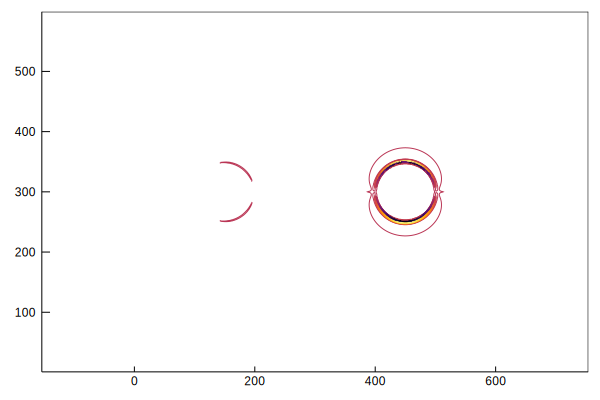

In [219]:
plot(divergence(v̄L),levels=31)